In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import IsolationForest

In [2]:
data = pd.read_csv('/Users/kareemwilliams/Downloads/metaverse_transactions_dataset.csv')

In [3]:
data

,timestamp,hour_of_day,sending_address,receiving_address,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,2022-04-11 12:47:27,12,0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da,0x39f82e1c09bc6d7baccc1e79e5621ff812f50572,796.949206,transfer,Europe,192.000,3,48,focused,established,18.7500,low_risk
1,2022-06-14 19:12:46,19,0xd6e251c23cbf52dbd472f079147873e655d8096f,0x51e8fbe24f124e0e30a614e14401b9bbfed5384c,0.010000,purchase,South America,172.000,5,61,focused,established,25.0000,low_risk
2,2022-01-18 16:26:59,16,0x2e0925b922fed01f6a85d213ae2718f54b8ca305,0x52c7911879f783d590af45bda0c0ef2b8536706f,778.197390,purchase,Asia,192.168,3,74,focused,established,31.2500,low_risk
3,2022-06-15 09:20:04,9,0x93efefc25fcaf31d7695f28018d7a11ece55457f,0x8ac3b7bd531b3a833032f07d4e47c7af6ea7bace,300.838358,transfer,South America,172.000,8,111,high_value,veteran,36.7500,low_risk
4,2022-02-18 14:35:30,14,0xad3b8de45d63f5cce28aef9a82cf30c397c6ceb9,0x6fdc047c2391615b3facd79b4588c7e9106e49f2,775.569344,sale,Africa,172.160,6,100,high_value,veteran,62.5000,moderate_risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78595,2022-02-13 12:52:27,12,0xa99b9a7f5c5dd37429771efd3b93c6fbe1ab2936,0x5a78c88c5fc1e9b512f6c64e266b46a9db0a7238,660.280373,transfer,Africa,172.000,1,27,random,new,26.2500,low_risk
78596,2022-02-16 16:15:29,16,0xcca095ad2d508c200bda1141f783d77c3e6cbb08,0xb71a4df291ea8e9996a74e77ab63f5abcbfe90f5,310.273397,purchase,Africa,172.000,5,60,focused,established,26.2500,low_risk
78597,2022-08-04 16:06:42,16,0xe0b340171486b08f0c1f4ac607ed776478cefd2b,0x577754308538f4be10a41afb4f8900cd24d7098f,624.674332,purchase,Africa,192.000,1,34,random,new,36.7500,low_risk
78598,2022-02-26 04:06:08,4,0xb0b2f6fc707fbb7f9d27a9f4fe0cb0d6b39a0155,0xd6ba299fdd52f09f01d9648036ca446498c01ac2,401.391592,purchase,Asia,192.168,4,56,focused,established,35.4375,low_risk


(array([6.6880e+03, 1.1071e+04, 1.7332e+04, 1.8886e+04, 1.4084e+04,
        7.2650e+03, 2.5420e+03, 6.0900e+02, 1.1100e+02, 1.2000e+01]),
 array([1.00000000e-02, 1.55724091e+02, 3.11438181e+02, 4.67152272e+02,
        6.22866362e+02, 7.78580453e+02, 9.34294543e+02, 1.09000863e+03,
        1.24572272e+03, 1.40143681e+03, 1.55715091e+03]),
 <BarContainer object of 10 artists>)

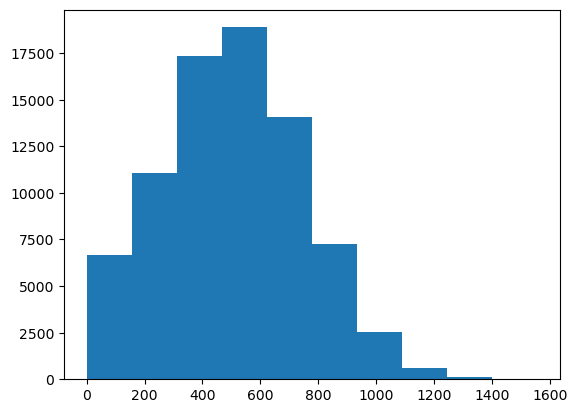

In [4]:
plt.hist(data[['amount']])

(array([26033.,     0.,     0.,     0.,     0., 26422.,     0.,     0.,
            0., 26145.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

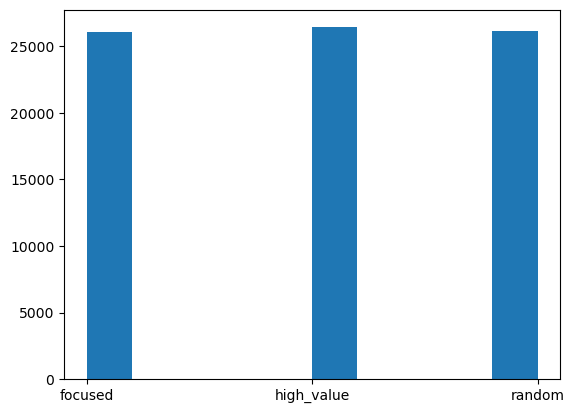

In [5]:
plt.hist(data[['purchase_pattern']])

(array([22125.,     0., 24940.,     0.,     0., 25040.,     0.,  2546.,
            0.,  3949.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

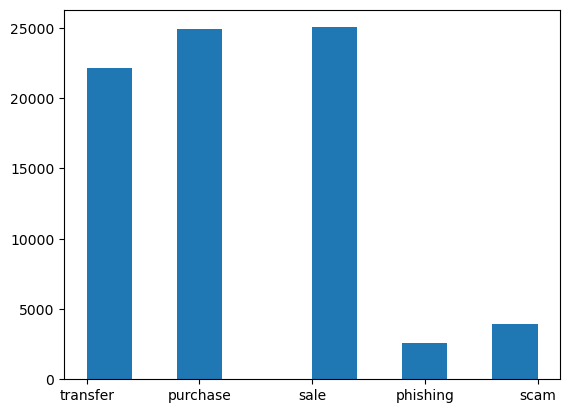

In [6]:
plt.hist(data['transaction_type'])

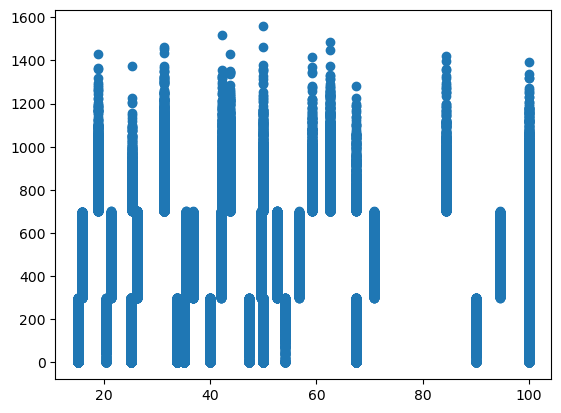

In [7]:
plt.scatter(data[['risk_score']], data[['amount']]) 

In [8]:
data = data.drop(columns=['sending_address', 'receiving_address', 'timestamp', 'ip_prefix', 'risk_score'])
data

,hour_of_day,amount,transaction_type,location_region,login_frequency,session_duration,purchase_pattern,age_group,anomaly
0,12,796.949206,transfer,Europe,3,48,focused,established,low_risk
1,19,0.010000,purchase,South America,5,61,focused,established,low_risk
2,16,778.197390,purchase,Asia,3,74,focused,established,low_risk
3,9,300.838358,transfer,South America,8,111,high_value,veteran,low_risk
4,14,775.569344,sale,Africa,6,100,high_value,veteran,moderate_risk
...,...,...,...,...,...,...,...,...,...
78595,12,660.280373,transfer,Africa,1,27,random,new,low_risk
78596,16,310.273397,purchase,Africa,5,60,focused,established,low_risk
78597,16,624.674332,purchase,Africa,1,34,random,new,low_risk
78598,4,401.391592,purchase,Asia,4,56,focused,established,low_risk


In [9]:
def transform(x):
    if x == 'high_risk':
        return 1
    else:
        return 0


data['anomaly'] = data['anomaly'].apply(transform)
data

,hour_of_day,amount,transaction_type,location_region,login_frequency,session_duration,purchase_pattern,age_group,anomaly
0,12,796.949206,transfer,Europe,3,48,focused,established,0
1,19,0.010000,purchase,South America,5,61,focused,established,0
2,16,778.197390,purchase,Asia,3,74,focused,established,0
3,9,300.838358,transfer,South America,8,111,high_value,veteran,0
4,14,775.569344,sale,Africa,6,100,high_value,veteran,0
...,...,...,...,...,...,...,...,...,...
78595,12,660.280373,transfer,Africa,1,27,random,new,0
78596,16,310.273397,purchase,Africa,5,60,focused,established,0
78597,16,624.674332,purchase,Africa,1,34,random,new,0
78598,4,401.391592,purchase,Asia,4,56,focused,established,0


In [10]:
data['anomaly'].value_counts()

anomaly
0    72105
1     6495
Name: count, dtype: int64

In [11]:
data[['location_region']].value_counts()

location_region
North America      15840
Europe             15807
Asia               15731
South America      15669
Africa             15553
Name: count, dtype: int64

In [12]:
data[['age_group']].value_counts()

age_group  
veteran        26422
new            26145
established    26033
Name: count, dtype: int64

In [13]:
data[['purchase_pattern']].value_counts()

purchase_pattern
high_value          26422
random              26145
focused             26033
Name: count, dtype: int64

In [14]:
data[['transaction_type']].value_counts()

transaction_type
sale                25040
purchase            24940
transfer            22125
scam                 3949
phishing             2546
Name: count, dtype: int64

In [15]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer

transformer = make_column_transformer(
  (StandardScaler(), ['hour_of_day','amount','login_frequency','session_duration']),
  (OneHotEncoder(), ['transaction_type', 'location_region', 'purchase_pattern', 'age_group']))

X = data.drop('anomaly', axis = 1)
y = data['anomaly']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.33, random_state=42)
pipe = Pipeline([('transformer', transformer),('iso', IsolationForest())]).fit(X_train)



In [16]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = pipe.predict(X_test)

# Convert predictions from {1, -1} to {0, 1} (1: normal, -1: anomaly)
y_pred = np.where(y_pred == 1, 0, 1)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 2698 21153]
 [    0  2087]]
              precision    recall  f1-score   support

           0       1.00      0.11      0.20     23851
           1       0.09      1.00      0.16      2087

    accuracy                           0.18     25938
   macro avg       0.54      0.56      0.18     25938
weighted avg       0.93      0.18      0.20     25938



In [17]:
confusion_matrix(y_test, y_pred)

array([[ 2698, 21153],
       [    0,  2087]])

In [19]:
# Define the parameter grid
param_grid = {
    'iso__n_estimators': [100, 200, 300, 500],
    'iso__max_samples': [0.25, 0.5, 0.75, 1.0],
    'iso__contamination': ['auto', 0.01, 0.05, 0.1, 0.2],
    'iso__max_features': [0.5, 0.75, 1.0],
    'iso__bootstrap': [True, False],
}

# Setup the grid search
grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit grid search
best_model = grid_search.fit(X_train, y_train)

/Users/kareemwilliams/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [20]:
y_pred = best_model.predict(X_test)

# Convert predictions from {1, -1} to {0, 1} (1: normal, -1: anomaly)
y_pred = np.where(y_pred == 1, 0, 1)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[23650   201]
 [ 2006    81]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     23851
           1       0.29      0.04      0.07      2087

    accuracy                           0.91     25938
   macro avg       0.60      0.52      0.51     25938
weighted avg       0.87      0.91      0.88     25938



In [21]:
grid_search.best_params_

{'iso__bootstrap': True,
 'iso__contamination': 0.01,
 'iso__max_features': 0.75,
 'iso__max_samples': 0.75,
 'iso__n_estimators': 100}

In [127]:
transformer = make_column_transformer(
  (OneHotEncoder(), ['transaction_type', 'location_region', 'purchase_pattern', 'age_group']))


pipe2 = Pipeline([('transformer', transformer),('iso', IsolationForest(random_state=42, bootstrap=True, contamination=.09, max_features=.2, n_estimators=124))]).fit(X_train)

y_pred = pipe2.predict(X_test)

# Convert predictions from {1, -1} to {0, 1} (1: normal, -1: anomaly)
y_pred = np.where(y_pred == 1, 0, 1)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[23851     0]
 [    0  2087]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23851
           1       1.00      1.00      1.00      2087

    accuracy                           1.00     25938
   macro avg       1.00      1.00      1.00     25938
weighted avg       1.00      1.00      1.00     25938



In [154]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, recall_score

# Create a scorer that uses f1_score with 'weighted' average
f1_scorer = make_scorer(f1_score, average='weighted', zero_division=0)

param_grid = {
    'iso__n_estimators': np.arange(50, 301, 20).tolist(),  # Generates values from 50 to 500 stepping by 50
    'iso__contamination': np.linspace(0.01, 0.5, 10).tolist(),  # Generates 10 values evenly spaced between 0.01 and 0.2
    'iso__max_features': np.linspace(0.1, 1.0, 10).tolist(),  # Generates 10 values evenly spaced between 0.1 and 1.0
    'iso__bootstrap': [True, False]
}


grid_search = GridSearchCV(estimator=pipe2, param_grid=param_grid, cv=3, scoring= f1_scorer, n_jobs=-1)

# Fit grid search
best_model = grid_search.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

# Convert predictions from {1, -1} to {0, 1} (1: normal, -1: anomaly)i
y_pred = np.where(y_pred == 1, 0, 1)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[23851     0]
 [ 1914   173]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     23851
           1       1.00      0.08      0.15      2087

    accuracy                           0.93     25938
   macro avg       0.96      0.54      0.56     25938
weighted avg       0.93      0.93      0.90     25938



dont need: sending, recieving, timestamp, ip_prefix, risk_score
reclassify anomaly column to be, 1- anamoly and 0 - not anamoly 
use encoders to transform: transaction_type, location_region, purchase_pattern, age_group

In [155]:
grid_search.best_params_

{'iso__bootstrap': True,
 'iso__contamination': 0.01,
 'iso__max_features': 0.9,
 'iso__n_estimators': 50}

In [158]:
param_grid = {
    'iso__n_estimators': np.arange(100, 301, 20).tolist(),  # Generates values from 50 to 500 stepping by 50
    'iso__contamination': np.linspace(0.01, 0.2, 10).tolist(),  # Generates 10 values evenly spaced between 0.01 and 0.2
    'iso__max_features': np.linspace(0.1, 1.0, 10).tolist(),  # Generates 10 values evenly spaced between 0.1 and 1.0
    'iso__bootstrap': [True, False]
}


grid_search = GridSearchCV(estimator=pipe2, param_grid=param_grid, cv=3, scoring= f1_scorer, n_jobs=-1)

# Fit grid search
best_model = grid_search.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

# Convert predictions from {1, -1} to {0, 1} (1: normal, -1: anomaly)i
y_pred = np.where(y_pred == 1, 0, 1)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[23851     0]
 [ 1919   168]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     23851
           1       1.00      0.08      0.15      2087

    accuracy                           0.93     25938
   macro avg       0.96      0.54      0.56     25938
weighted avg       0.93      0.93      0.90     25938



In [159]:
grid_search.best_params_

{'iso__bootstrap': True,
 'iso__contamination': 0.01,
 'iso__max_features': 0.8,
 'iso__n_estimators': 140}

In [164]:
from sklearn.inspection import permutation_importance


# Calculate permutation importance
results = permutation_importance(pipe2, X_test, y_test, scoring=f1_scorer)

# Get importance scores
importance_scores = results.importances_mean

# Print the feature importance
for i, score in enumerate(importance_scores):
    print(f"Feature {i}: Importance {score}")

Feature 0: Importance 0.0
Feature 1: Importance 0.0
Feature 2: Importance -0.011814628206587125
Feature 3: Importance 0.0
Feature 4: Importance 0.0
Feature 5: Importance 0.0
Feature 6: Importance 0.0
Feature 7: Importance 0.0


In [165]:
X_test

,hour_of_day,amount,transaction_type,location_region,login_frequency,session_duration,purchase_pattern,age_group
69753,0,788.154153,sale,Europe,2,28,random,new
10632,8,234.826403,transfer,North America,2,25,random,new
15147,7,190.103667,scam,Africa,1,21,random,new
7285,9,738.512316,sale,Asia,2,34,random,new
41654,5,536.142681,purchase,Asia,5,60,focused,established
...,...,...,...,...,...,...,...,...
70391,10,670.766363,sale,Asia,7,96,high_value,veteran
8207,0,681.744510,phishing,Africa,2,37,random,new
51018,15,814.885243,purchase,Africa,2,25,random,new
29582,11,734.069072,sale,South America,7,107,high_value,veteran


In [166]:
results

{'importances_mean': array([ 0.        ,  0.        , -0.01181463,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ]),
 'importances_std': array([0.00000000e+00, 0.00000000e+00, 6.64278387e-05, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
 'importances': array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [-0.01169032, -0.01185236, -0.01185055, -0.01187611, -0.0118038 ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])}

In [170]:
X1 = data.drop(['anomaly', 'transaction_type'], axis = 1)
X_train2, X_test2, y_train, y_test = train_test_split(X,y, test_size=.33, random_state=42)


pipe4 = Pipeline([('transformer', transformer),('iso', IsolationForest())]).fit(X_train2)

# Calculate permutation importance
results = permutation_importance(pipe4, X_test2, y_test, scoring=f1_scorer)

# Get importance scores
importance_scores = results.importances_mean

# Print the feature importance
for i, score in enumerate(importance_scores):
    print(f"Feature {i}: Importance {score}")

Feature 0: Importance 0.0
Feature 1: Importance 0.0
Feature 2: Importance 0.0
Feature 3: Importance 0.0
Feature 4: Importance 0.0
Feature 5: Importance 0.0
Feature 6: Importance 0.0
Feature 7: Importance 0.0


In [171]:
y_pred = pipe4.predict(X_test)

# Convert predictions from {1, -1} to {0, 1} (1: normal, -1: anomaly)i
y_pred = np.where(y_pred == 1, 0, 1)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[    0 23851]
 [    0  2087]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     23851
           1       0.08      1.00      0.15      2087

    accuracy                           0.08     25938
   macro avg       0.04      0.50      0.07     25938
weighted avg       0.01      0.08      0.01     25938



/Users/kareemwilliams/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kareemwilliams/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kareemwilliams/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [172]:
X_test['transaction_type'].value_counts()

transaction_type
purchase    8255
sale        8211
transfer    7385
scam        1257
phishing     830
Name: count, dtype: int64

In [181]:
data[data['transaction_type'] == 'phishing']['anomaly'].value_counts()

anomaly
1    2546
Name: count, dtype: int64